<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2019


En este notebook se aborda el tema de aprendizaje de máquina para clasificación binaria no-lineal utilizando una red neuronal simple.
1. forward-propagation.
2. backward-propagation.

<hr>
# 1. El problema XOR

<img src='res/shallow_nn/xor_problem.png'>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets

<hr>

# 1. Red Neuronal: implementacion del descenso del gradiente

## 1.1. Algunas utilidades

In [2]:
def generate_data(data_type, noise=0.2):
    """
    Generate a binary dataset with distribution data_type

    Arguments:
    data_type -- distribution of dataset {moons,circles,blobs}

    Returns:
    X -- features
    Y -- labels
    """ 
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(200, noise=noise)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(200, noise=noise)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, cluster_std=noise)
    return X, Y

<hr>

## 1.2. Funciones principales de la red neuronal

In [3]:
def linear_activation(W, b, a):
    z = np.dot(W,a) + b
    
    return z

In [4]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [5]:
def d_sigmoid(z):
    return sigmoid(z) * (1. - sigmoid(z))

In [6]:
def loss(y, a):
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [7]:
def cost(logloss):
    return np.mean(logloss)

### - Dataset XOR

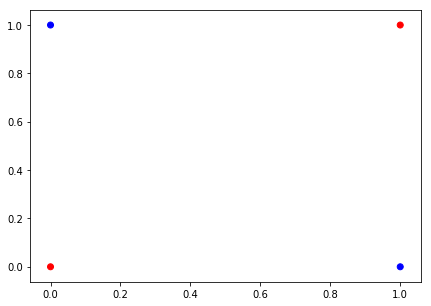

In [8]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0, 1, 1, 0]])

nx, m = X.T.shape
color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

X = X.T

<hr>

## 1.3. Inicialización de los parámetros de la red neuronal.

Creemos una red neuronal de dos neuronas en la capa 1 y una neurona en la capa 2 (salida).

In [9]:
W1 = np.random.rand(2,2)
b1 = np.zeros([2,1])

W2 = np.random.rand(1, 2)
b2 = 0

print(W1, b1)
print(W2, b2)

(array([[0.74865373, 0.18223553],
       [0.07800341, 0.48469309]]), array([[0.],
       [0.]]))
(array([[0.0934386 , 0.63223901]]), 0)


<hr>

## 1.4. Entrenamiento de la red neuronal.

('costo -- iteracion ', 0, ': ', 0.7147217813161034)
('costo -- iteracion ', 1000, ': ', 0.584580641756197)
('costo -- iteracion ', 2000, ': ', 0.030237013070740476)
('costo -- iteracion ', 3000, ': ', 0.012031114216314222)
('costo -- iteracion ', 4000, ': ', 0.007417539935818107)
('costo -- iteracion ', 5000, ': ', 0.005341404009235536)
('costo -- iteracion ', 6000, ': ', 0.004166182386703854)
('costo -- iteracion ', 7000, ': ', 0.003411635505478572)
('costo -- iteracion ', 8000, ': ', 0.0028868187025748453)
('costo -- iteracion ', 9000, ': ', 0.0025009737530529586)
('parametros actualizados: ', (array([[5.76738   , 5.76538786],
       [7.55073226, 7.54029344]]), array([[-14.14911366,  13.36248267]])))


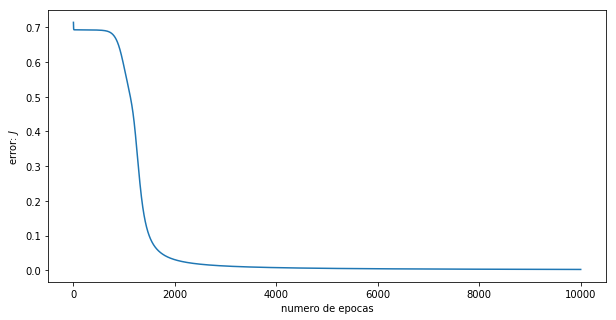

In [10]:
'''
Metaparameters initialization
'''
num_epochs = 10000
learning_rate = 0.5

error_array = np.zeros([num_epochs])#lo utilizaremos para plotear el error

'''
Gradient descent
'''
for i in range(num_epochs): #2000 iteraciones del descenso del gradiente
    '''
    Forward Propagation
    '''
    Z1 = linear_activation(W1, b1, X)
    A1 = sigmoid(Z1)

    Z2 = linear_activation(W2, b2, A1)
    A2 = sigmoid(Z2)

    '''
    Backward Propagation
    '''
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.multiply(np.dot(W2.T, dZ2), d_sigmoid(Z1))
    dW1 = np.dot(dZ1, X.T) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    '''
    Parameters Update
    '''
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    b1 -= learning_rate * db1
    b2 -= learning_rate * db2

    '''
    Cost estimation
    '''
    J = cost(loss(Y,A2))
    error_array[i] = J
    
    
    if(i%1000 == 0):
        print("costo -- iteracion ", i, ": ", J)
        
print("parametros actualizados: ", (W1, W2))


'''
Visualizacion del error por epoca
'''
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,num_epochs-1, num_epochs), error_array)
plt.xlabel("numero de epocas")
plt.ylabel("error: "+r'$J$')
plt.show()

### - Visualizacion del resultado

In [11]:
def visualize_lr(parameters, X, Y):
    X = X.T
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

def predict_multilayer(parameters, X):
    
    A = X
    
    for i in range(1,3):
        Wi = parameters['W'+str(i)]
        bi = parameters['b'+str(i)]
        
        Z = linear_activation(Wi,bi,A)
        A = sigmoid(Z)
    
    return A     

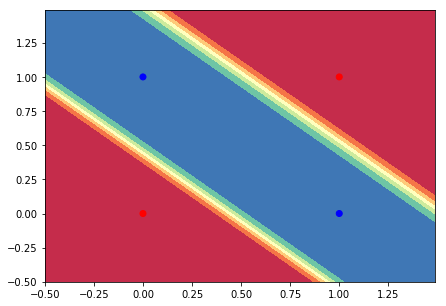

In [12]:
parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
visualize_lr(parameters, X, Y)

<hr>

# Trabajemos

## Ejercicio 1
1. Modificar la red neuronal anterior para que tenga 3 neuronas en la capa 1, 2 neuronas en la capa 2 y una neurona en la capa 3.
2. Modificar el código para el forward propagation.
3. Modificar el código para el backward propagation.
4. Entrenar la nueva red neuronal con el problema XOR y comparar resultados.

## Ejercicio 2
Entrenar la nueva red para el dataset 'moons' y validar resultados.

In [13]:
X, Y = generate_data('moons', noise=0.1)

nx, m = X.T.shape
color = ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]

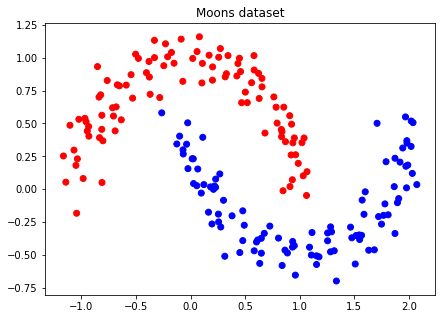

In [14]:
plt.figure(figsize=(7,5))
plt.title("Moons dataset")
plt.scatter(X[:,0], X[:,1], color=color)

plt.show()

In [15]:
X = X.T #Transponemos el dataset para que quede de tamanio nx, m

<hr>

# 2. Red Neuronal: Keras

Implementemos la red neuronal anterior utilizando la libreria Keras y apliquemos la red al dataset XOR.

In [16]:
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [23]:
#creamos el dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]], dtype=float)
Y = np.array([[0, 1, 1, 0]]).T
####X, Y = generate_data('moons', noise=0.1)

#1. creeamos una nueva red de tipo secuencial
model = keras.Sequential()

#2. Agregamos las capas de la red, en este caso dos, la primera de dos neuronas y la segunda de 1.
model.add(keras.layers.Dense(units=2, activation='sigmoid', input_dim=2))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

#3. compilamos el modelo
opt = keras.optimizers.rmsprop(lr=0.1)
model.compile(optimizer=opt, loss='binary_crossentropy')

#4. entrenamos el modelo
history = model.fit(X, Y, epochs=1000, verbose=False)

In [24]:
#Mostremos el detalle del modelo
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


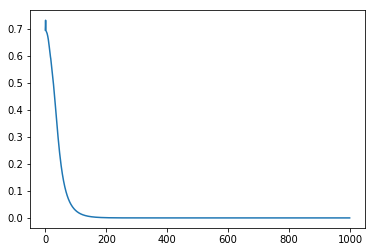

In [25]:
#grafiquemos el error (loss) por cada epoca de entrenamiento
plt.plot(history.history['loss'])
plt.show()

In [26]:
#Imprimamos los parametros de la red
print(model.layers[0].get_weights()) #W1, b1
print(model.layers[1].get_weights()) #W2, b2

[array([[-12.812713, -16.135641],
       [-12.812043, -16.1181  ]], dtype=float32), array([19.170444,  7.501095], dtype=float32)]
[array([[ 32.910183],
       [-32.941055]], dtype=float32), array([-16.18073], dtype=float32)]


In [27]:
def visualize_keras(model, X, Y):
    X = X
    
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    #Z = predict_multilayer(parameters, np.c_[xx.ravel(), yy.ravel()].T)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    
    color= ['blue' if y == 1 else 'red' for y in np.squeeze(Y)]
    plt.scatter(X[:,0], X[:,1], color=color)
    
    plt.show()

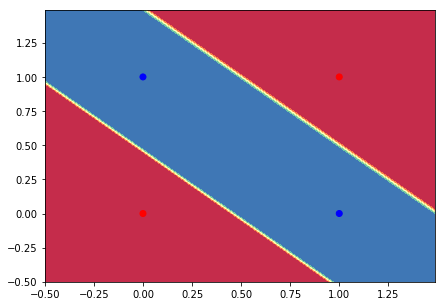

In [28]:
visualize_keras(model,X,Y)